In [1]:
import pandas as pd
churn_data = pd.read_csv('C:\VS Code\churn/churn.csv')
churn_data.drop('RowNumber', axis=1, inplace= True)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

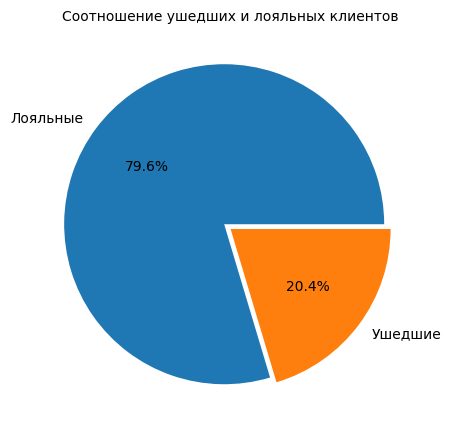

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data['Exited'].value_counts(),
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.1f%%',
    explode = [0.05, 0]
)
title = axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=10)

Вывод: Наглядно показывает соотношения  ушедших и лояльных клиентов  круговая диграмма. Лояльных клиентов 79,6%, ушедших 20,4%. 


9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0, 0.5, 'Клиенты баланс у которых > 2500')

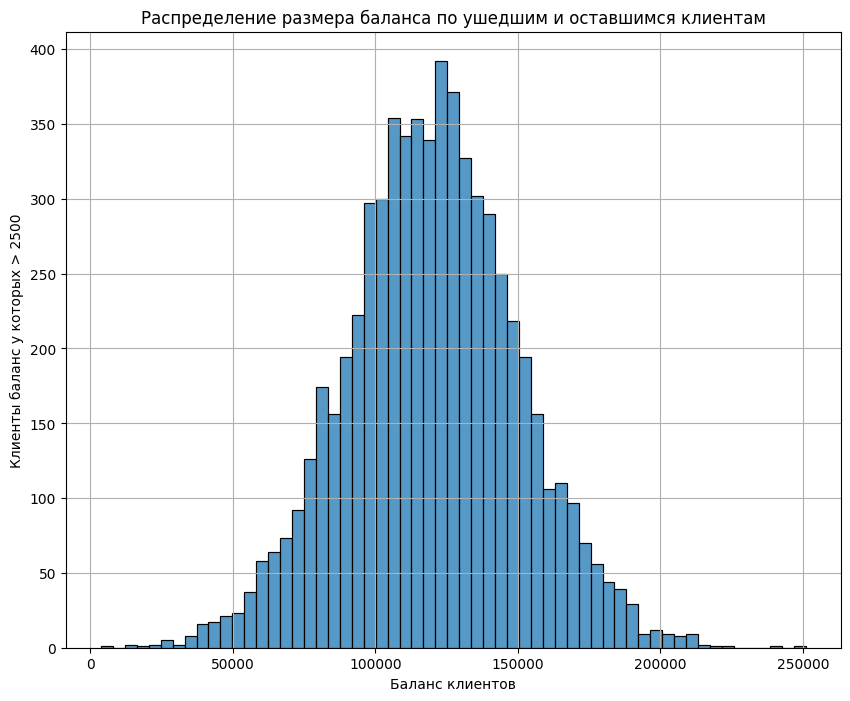

In [3]:
mask = churn_data['Balance'] > 2500
fig, axes = plt.subplots(figsize=(10, 8))
sns.histplot(churn_data[mask], x = 'Balance')
axes.grid()
axes.set_title('Распределение размера баланса по ушедшим и оставшимся клиентам')
axes.set_xlabel('Баланс клиентов')
axes.set_ylabel('Клиенты баланс у которых > 2500')



Вывод:У большинства клиентов, с расмотренными условиями баланс находится в диапазоне от 100 000 до 150 000, выбросы  до 50 000 и от 200 000  встречаются значительно реже. Гистограмма имеет колоколообразный и практически симметричный вид, можно сделать вывод о том что распределение нормальное.


9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [4]:
import plotly.express as px
fig = px.histogram(data_frame=churn_data, x='Balance', color='Exited', histfunc='count', title='Гистограмма распределения баланса в зависимости от лояльности клиента', nbins = 50)
fig.show()


Вывод: Мы видим большое количество лояльных клиентов с нулевым балансом, у ушедших клиентов нулевых балансов значительно меньше.


9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

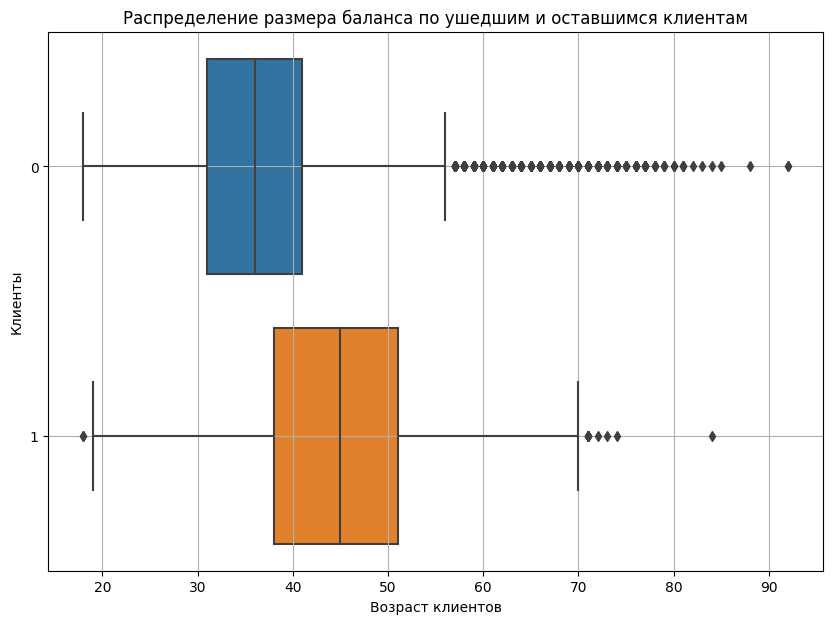

In [5]:
fig = plt.figure(figsize = (10,7))
box = sns.boxplot(data = churn_data, y = 'Exited', x = 'Age', orient = 'h', width = 0.8)
box.set_title('Распределение размера баланса по ушедшим и оставшимся клиентам')
box.set_xlabel('Возраст клиентов')
box.set_ylabel('Клиенты')
box.grid()

Вывод: Потенциальных выбросов больше в группе лояльных клиентов. Большинство лояльных клиентов находятся в возрастной группе  от 30 до 40 лет. 


9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [6]:
px.ecdf(churn_data, x="CreditScore", y="EstimatedSalary", color = 'Exited')

Вывод: Зарабатная плата у лояльных клиентов незначительно ниже, чем  у ушедших.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

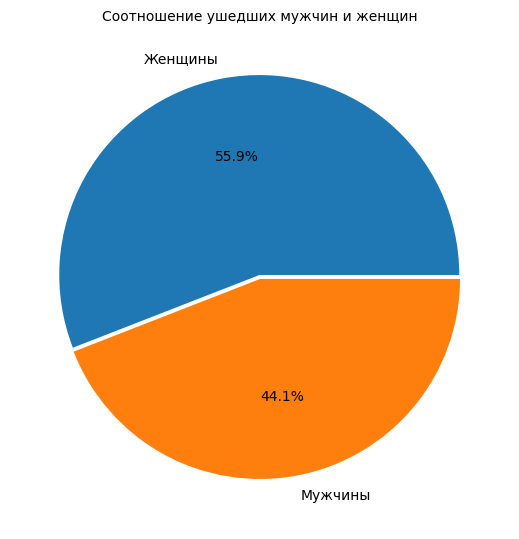

In [7]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes((0, 0, 1, 1))
pie = ax.pie(churn_data[churn_data['Exited'] == 1].groupby('Gender')['Exited'].value_counts(), labels=('Женщины', 'Мужчины'), autopct='%1.1f%%', explode = [0.02, 0])
title = ax.set_title('Соотношение ушедших мужчин и женщин', fontsize=10)

Вывод: Мужщины более лояльные клиенты

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [8]:
px.histogram(churn_data, x = 'Exited',  color = 'NumOfProducts')

Вывод: У лояльных клиентов приобретенных у банка услуг больше, но их количество меньше, у ушедших чаще встречаютя 3-4 услуги. Можно предлположить что, одной из причин оттока клиентов могут быть предоставленные банком услуги.


9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

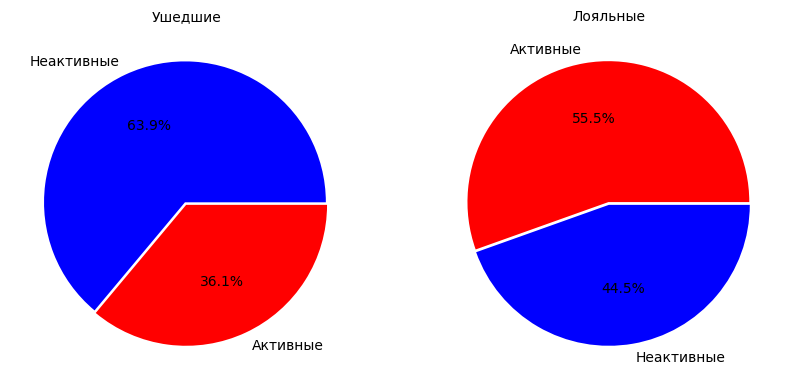

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].pie(churn_data[churn_data['Exited'] == 1]['IsActiveMember'].value_counts(), labels=('Неактивные', 'Активные'), autopct='%1.1f%%', explode = [0.02, 0], colors = ['b', 'r'])
title = axes[0].set_title('Ушедшие', fontsize=10)
axes[1].pie(churn_data[churn_data['Exited'] == 0]['IsActiveMember'].value_counts(), labels=('Активные', 'Неактивные'), autopct='%1.1f%%', explode = [0.02, 0], colors = ['r', 'b'])
title = axes[1].set_title('Лояльные', fontsize=10)

Выводы: Процент ушедших клиентов имеющих статус активного клиента 36,1%', в то время как у лояльных клиентов процент активных клиентов 55,5%. 
Рекомендация: Для уменьшения оттока неактивных клиентов, следует повысить  активность   с помощью индивидуальных выгодных предложений.



9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [10]:

fig = px.choropleth(
    data_frame = (pd.DataFrame(dict(churn_data[churn_data['Exited'] == 1].Geography.value_counts()*100/churn_data.Geography.value_counts()).items(), columns=['Country', 'ExitedSum'])),
    locations = 'Country',locationmode = 'country names',range_color=[0, 35],color= 'ExitedSum',color_continuous_scale="bluered", 
    title = 'Доля ушедших клиентов по странам', scope="europe", width = 900, height=600, center={'lat': 47, 'lon': 2})
fig.show()

Вывод: Доля ушедших клиентов в Германии - 32,44%, что в два раза превышает данный показатель для Испании и Франции


9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [11]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data.drop('CreditScore', axis=1, inplace= True)    
churn_data.head()

,CustomerId,Surname,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15634602,Hargrave,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,Hill,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,Onio,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,Boni,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,Mitchell,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


<Axes: xlabel='Tenure', ylabel='CreditScoreCat'>

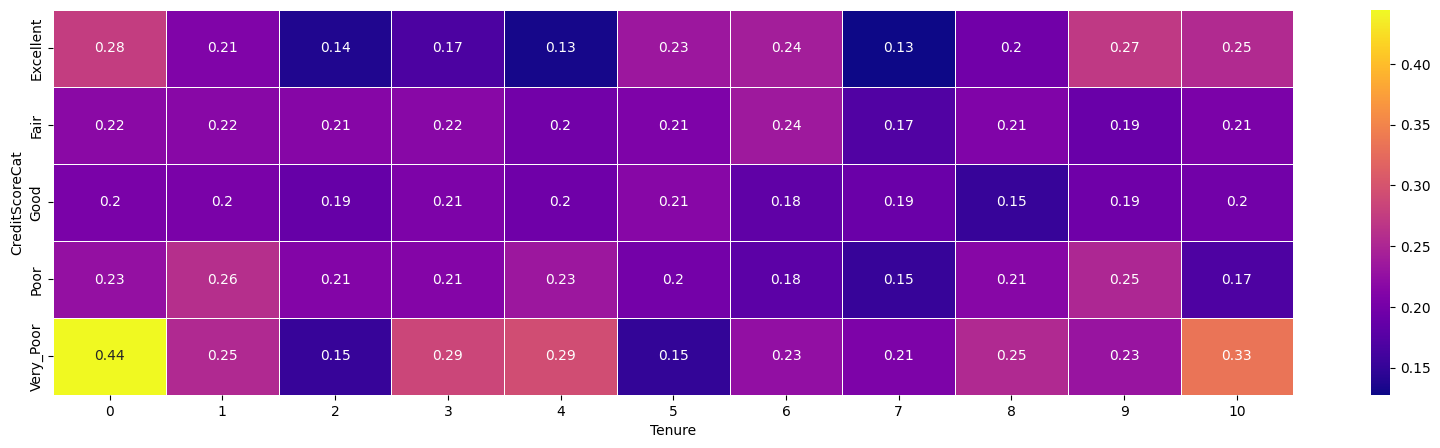

In [12]:

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(churn_data.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean'), annot = True, linewidth=.5, cmap="plasma")


Вывод: Чаще уходят клиенты с самым низким кредитным рейтингом - Very_Poor. Опираясь на  тепловую карту клиентами ония являются меньше года.
